# Implementing Forward Propagation with numpy

In [1]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
print("All imported")


All imported


## This is what we want to implement 

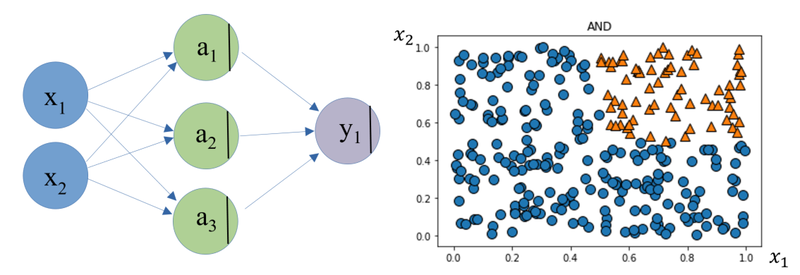

## A common superclass called "Layer" 

In [2]:
class Layer:
    """
    An identity Layer to be the base of inheritance
    """
    def __init__(self):
        pass
    
    def forward(self, input):
        # identity, same output as input
        return input

## A sigmoid Layer
In most frameworks the activation function is part of the layer that does the linear combination. For didatic reasons we implement this is a seperate Layer. Basically it appiles the sigmoid function $\sigma(x)= \frac{1}{1+e^{-x}}$ 

In [3]:
class Sigmoid(Layer):
    def __init__(self):
        pass
    
    def forward(self, input):
        """Apply elementwise sigmoid to [input_units] vector"""
        return 1/(1 + np.exp(-input))
    
    def __str__(self):
        return "Sigmoid"

In [10]:
#test sigmoid Layer
s = Sigmoid()
s.forward(np.array([0,1,3,4]))

array([0.5       , 0.73105858, 0.95257413, 0.98201379])

## A dense Layer
A dense layer is specified by the size of the input vector and the output vector. Inside the Dense layer we store weights and biases. They have to be initialized.

We define the forward function that is executed in the forward pass.

In [34]:
# Add missing code whereever we have _?_
class Dense(Layer):
    """
    Make the linear combination of weights and inputs and add the biasvalues
    No activation yet
    A dense layer f(x) = <x*W> + b
    """
    def __init__(self, input_units, output_units):
        # initialize weights with small random numbers. We use normal initialization, 
        self.weights = np.random.randn(output_units, input_units)*0.01
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        return (np.dot(self.weights, input)+self.biases)
    
    def __str__(self):
        return f"Dense {self.weights.shape}\n{self.weights}"

In [35]:
# Test dense Layer (first layer)
# Print it with a description, its weights and biases
# create positive example and call forward
d = Dense(2,3)
print(d)
d.forward(np.array([0.3,0.3]))


Dense (3, 2)
[[-0.00384519  0.00835504]
 [ 0.00169646 -0.00187809]
 [ 0.01445394  0.00314322]]


array([ 1.35295602e-03, -5.44892309e-05,  5.27914864e-03])

## Create Network code for single Training examples

Look at the example network structure at the left. 
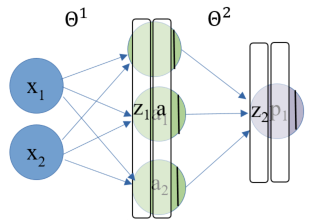
* We realize it in a hardcoded way and initialize all layers.
* We then set weights that we created in the lecture.
* then we need to implement predict, which does the complete forward path
* We implement a __str__ function to output the network structure


In [37]:
class Network:
    def __init__(self): 
        # create all layers in attibutes d/s/o
        self.d = Dense(3,2)
        self.s = Sigmoid()
        self.o = Dense(3,1)
        
        # Assign weights and Biases
        self.d.weights = np.array([[1000,0],[0,1000],[0,0]])  # Weights first Layer (outputunits x inputunits)
        self.d.biases = np.array([-500,-500,0])              # Biasvalues first layer (outputunits)
        self.o.weights = np.array([[10, 10, 0]])              # Weights second Layer (inputunits x outputunits)
        self.o.biases = np.array([-18])                      # Biasvalues second layer (outputunits)

    def predict(self, input, verbose=False):
        z1 = self.d.forward(input) 
        a = self.s.forward(z1);
        z2 = self.o.forward(a);
        y = self.s.forward(z2);
        return y

    def __str__(self):
        text = "Network:\n"
        text +=  f"Layer1 weights:\n{self.d.weights}\n"
        text +=  f"Layer1 biases:{self.d.biases}\n"
        text +=  f"Layer2 weights:{self.o.weights}\n"
        text +=  f"Layer2 biases:{self.o.biases}\n"
        return text

net = Network()
print(net)


Network:
Layer1 weights:
[[1000    0]
 [   0 1000]
 [   0    0]]
Layer1 biases:[-500 -500    0]
Layer2 weights:[[10 10  0]]
Layer2 biases:[-18]



## Test by making predictions

In [40]:
#instantiate the network and make a prediction
input = np.array([0.8,0.8]) # 300 300 0
#input = np.array([0.8,0.4]) # 100 -100 0 

net.predict(input)

array([0.88079708])

## Add a the loss function (log loss)

![](attachment:grafik-X.png)
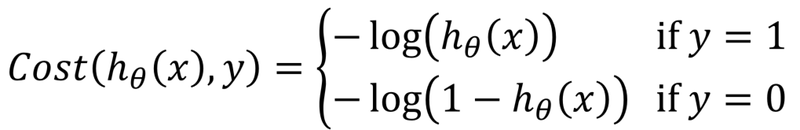

In [41]:
class Network:
    def __init__(self): 
        self.d = Dense(2,3)
        self.s = Sigmoid()
        self.o = Dense(3,1)

        self.d.weights = np.array([[1000,0],[0,1000],[0,0]]) # inputunits x outputunits
        self.d.biases = np.array([-500,-500,0])              # outputunits
        self.o.weights = np.array([[10, 10, 0]])             # inputunits x outputunits
        self.o.biases = np.array([-18])                      # outputunits
        
    def loss(self, y, pred):
        return -(y*np.log(pred)+(1-y)*np.log(1-pred))

    def predict(self, input):
        z1 = self.d.forward(input)
        a = self.s.forward(z1)
        z2 = self.o.forward(a)
        y = self.s.forward(z2)
        return y
    
    def __str__(self):
        text = "Network:\n"
        text +=  f"Layer1 weights:\n{self.d.weights}\n"
        text +=  f"Layer1 biases:{self.d.biases}\n"
        text +=  f"Layer2 weights:{self.o.weights}\n"
        text +=  f"Layer2 biases:{self.o.biases}\n"
        return text
    
print(Network())

Network:
Layer1 weights:
[[1000    0]
 [   0 1000]
 [   0    0]]
Layer1 biases:[-500 -500    0]
Layer2 weights:[[10 10  0]]
Layer2 biases:[-18]



![](attachment:grafik2.png)
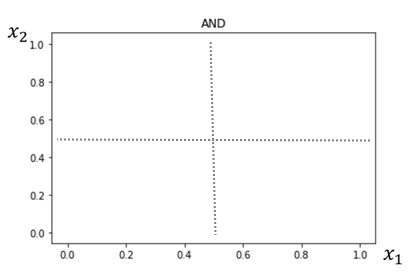
## Calculate prediction and loss for some points



In [44]:
x1 = np.array([0.6,0.4]) # negative class
x2 = np.array([0.8,0.8]) # positive class
net = Network()

p1 = net.predict(x1)
p2 = net.predict(x2)

print(f"negative point - p={p1}, prediction={p1>0.5}, loss={net.loss(0, p1)}");
print(f"positive point - p={p2}, prediction={p2>0.5}, loss={net.loss(1, p2)}");

#now make the output like
#negative point - p=[ % ] prediction=[ True/False ] loss=  
#positive point - p=[ % ] prediction=[ True/False ] loss=



negative point - p=[0.00033535], prediction=[False], loss=[0.00033541]
positive point - p=[0.88079708], prediction=[ True], loss=[0.12692801]


# Make many predictions and plot the results 

In [46]:
X = np.random.rand(500,2);
p = np.ones(500);


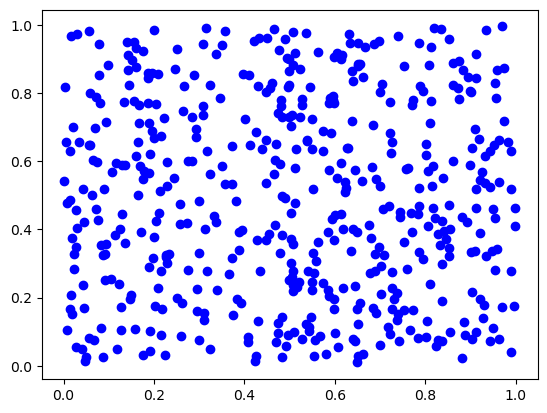

In [47]:
#plot unclassified 
plt.scatter(X[:,0],X[:,1],c="blue", marker="o")

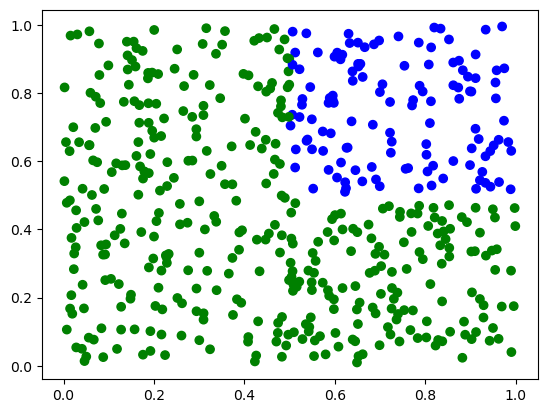

In [52]:
#classify and plot
network = Network();
for i in range(500):
    p[i] = network.predict(X[i])
    
#np.array(["blue", "green"])[(p<0.5)*1]

plt.scatter(X[:,0],X[:,1],c=np.array(["blue", "green"])[(p<0.5)*1], marker="o")
plt.show()